## Kernel PCA

Standard Principal components are obtained from **eigenvectors** of covariance matrix, and give directions in which the data have maximal variance. **Kernel PCA** expand the scope of **PCA**, mimicking what would we obtain if we were to expand the features by non-linear transformations, and then apply **PCA** in this transformed feature space. Below we will learn the use of Kernel PCA technique.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def sampleCircle(radius, size):
    """
    This function generates random looking data on a circle of radius
    """
    x = (2*np.random.rand(size)-1)*radius
    d = radius**2 - x**2
    y = d**0.5 * np.random.choice([-1,1], size=size) + np.random.randn(size) * 0.25
    return (x, y)

#Generate three random circle data with radius 1, 2.5 and 5 and noise with sd of 0.25
(x1, y1) = sampleCircle(1, 1000)
(x2, y2) = sampleCircle(2.5, 1000)
(x3, y3) = sampleCircle(5, 1000)

X = np.hstack([x1, x2, x3])
y = np.hstack([y1, y2, y3])
X = np.vstack([X,y]).T

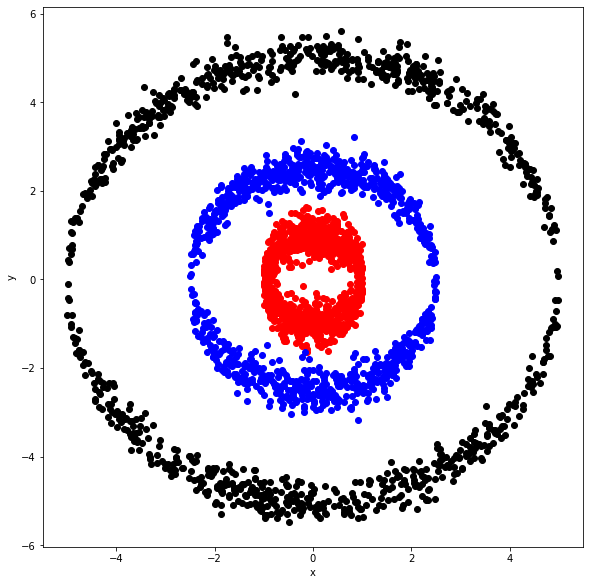

In [3]:
def plotData(X):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_axes([0,0,1.5, 1.5])
    ax.plot(X[:1000,0], X[:1000,1], 'ro')
    ax.plot(X[1000:2000,0], X[1000:2000,1], 'bo')
    ax.plot(X[2000:,0], X[2000:,1], 'ko')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
plotData(X)

Now lets apply Linear PCA on the above data. It wont be able to separate the data much

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

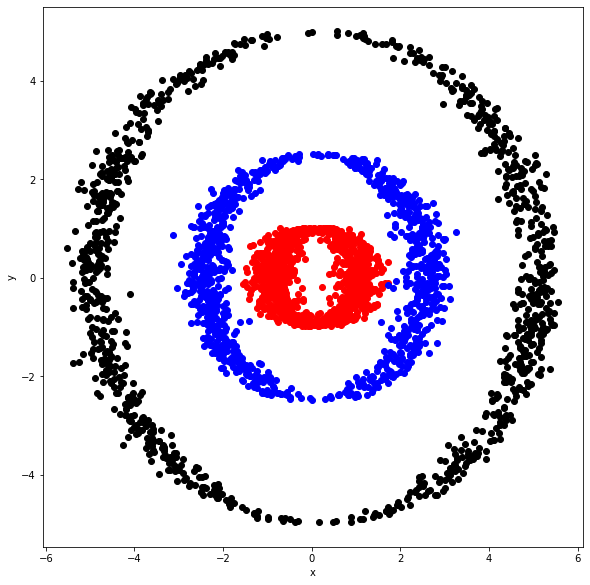

In [5]:
plotData(X_pca)

We can see from above not much changed in the data. Now lets fit Kernel PCA

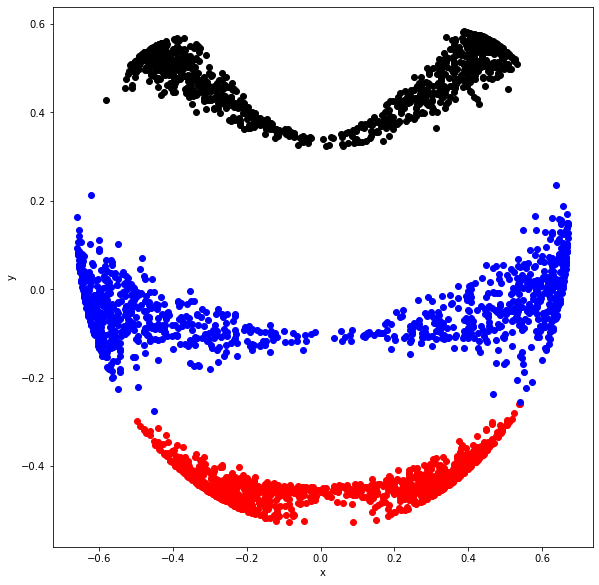

In [6]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel="rbf", gamma=0.1)
X_kpca = kpca.fit_transform(X)
plotData(X_kpca)

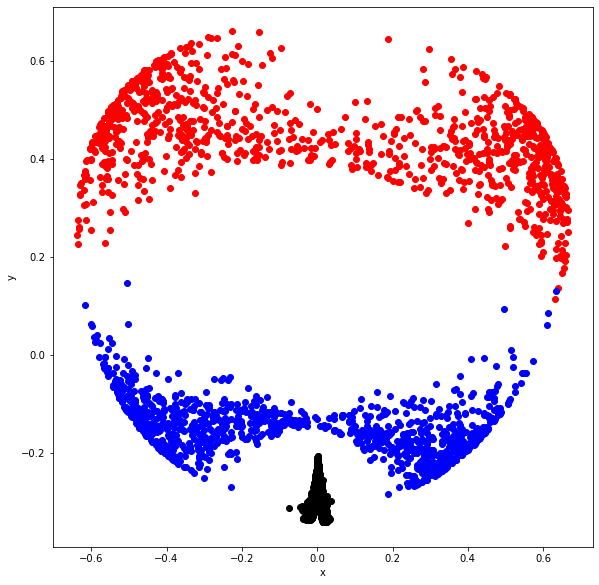

In [7]:
kpca = KernelPCA(kernel="rbf", gamma=0.5)
X_kpca = kpca.fit_transform(X)
plotData(X_kpca)

We can see from the above plots that we get a very good separation between the three circles.